Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


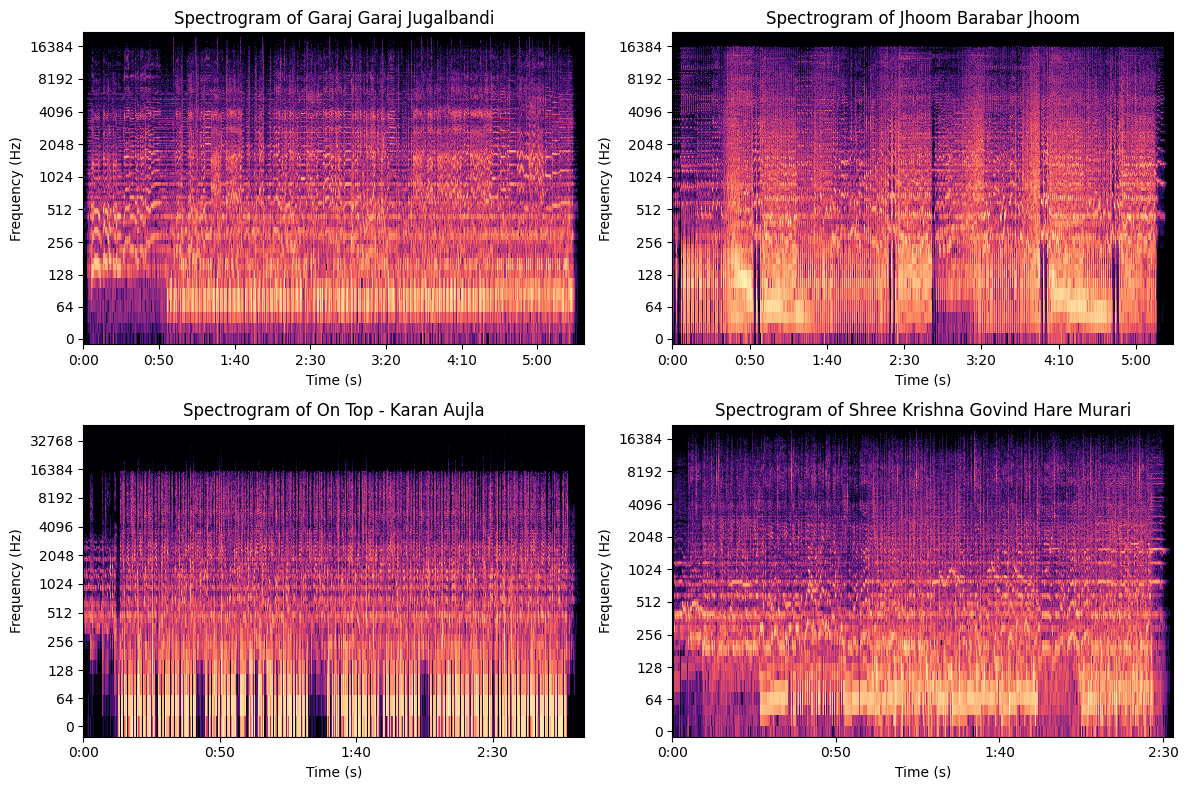

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# File paths for uploaded WAV songs
file_paths = {
    "Garaj Garaj Jugalbandi": "/content/drive/MyDrive/songs/Garaj_Garaj_Jugalbandi.wav",
    "Jhoom Barabar Jhoom": "/content/drive/MyDrive/songs/Jhoom_Barabar_Jhoom.wav",
    "On Top - Karan Aujla": "/content/drive/MyDrive/songs/On_Top_Karan_Aujla.wav",
    "Shree Krishna Govind Hare Murari": "/content/drive/MyDrive/songs/Shree_Krishna_Govind_Hare_Murari.wav",
}

# Function to generate and plot spectrogram
def plot_spectrogram(file_path, title, ax):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Compute Short-Time Fourier Transform (STFT)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

        # Plot spectrogram on the given axes
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax)
        ax.set_title(f'Spectrogram of {title}')
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Frequency (Hz)")
    except Exception as e:
        print(f"Error processing {title}: {e}")

# Create a figure and axes for the 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate spectrograms for each song and place them in the grid
for i, (song, path) in enumerate(file_paths.items()):
    plot_spectrogram(path, song, axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
plt.savefig('spectrograms.png')